
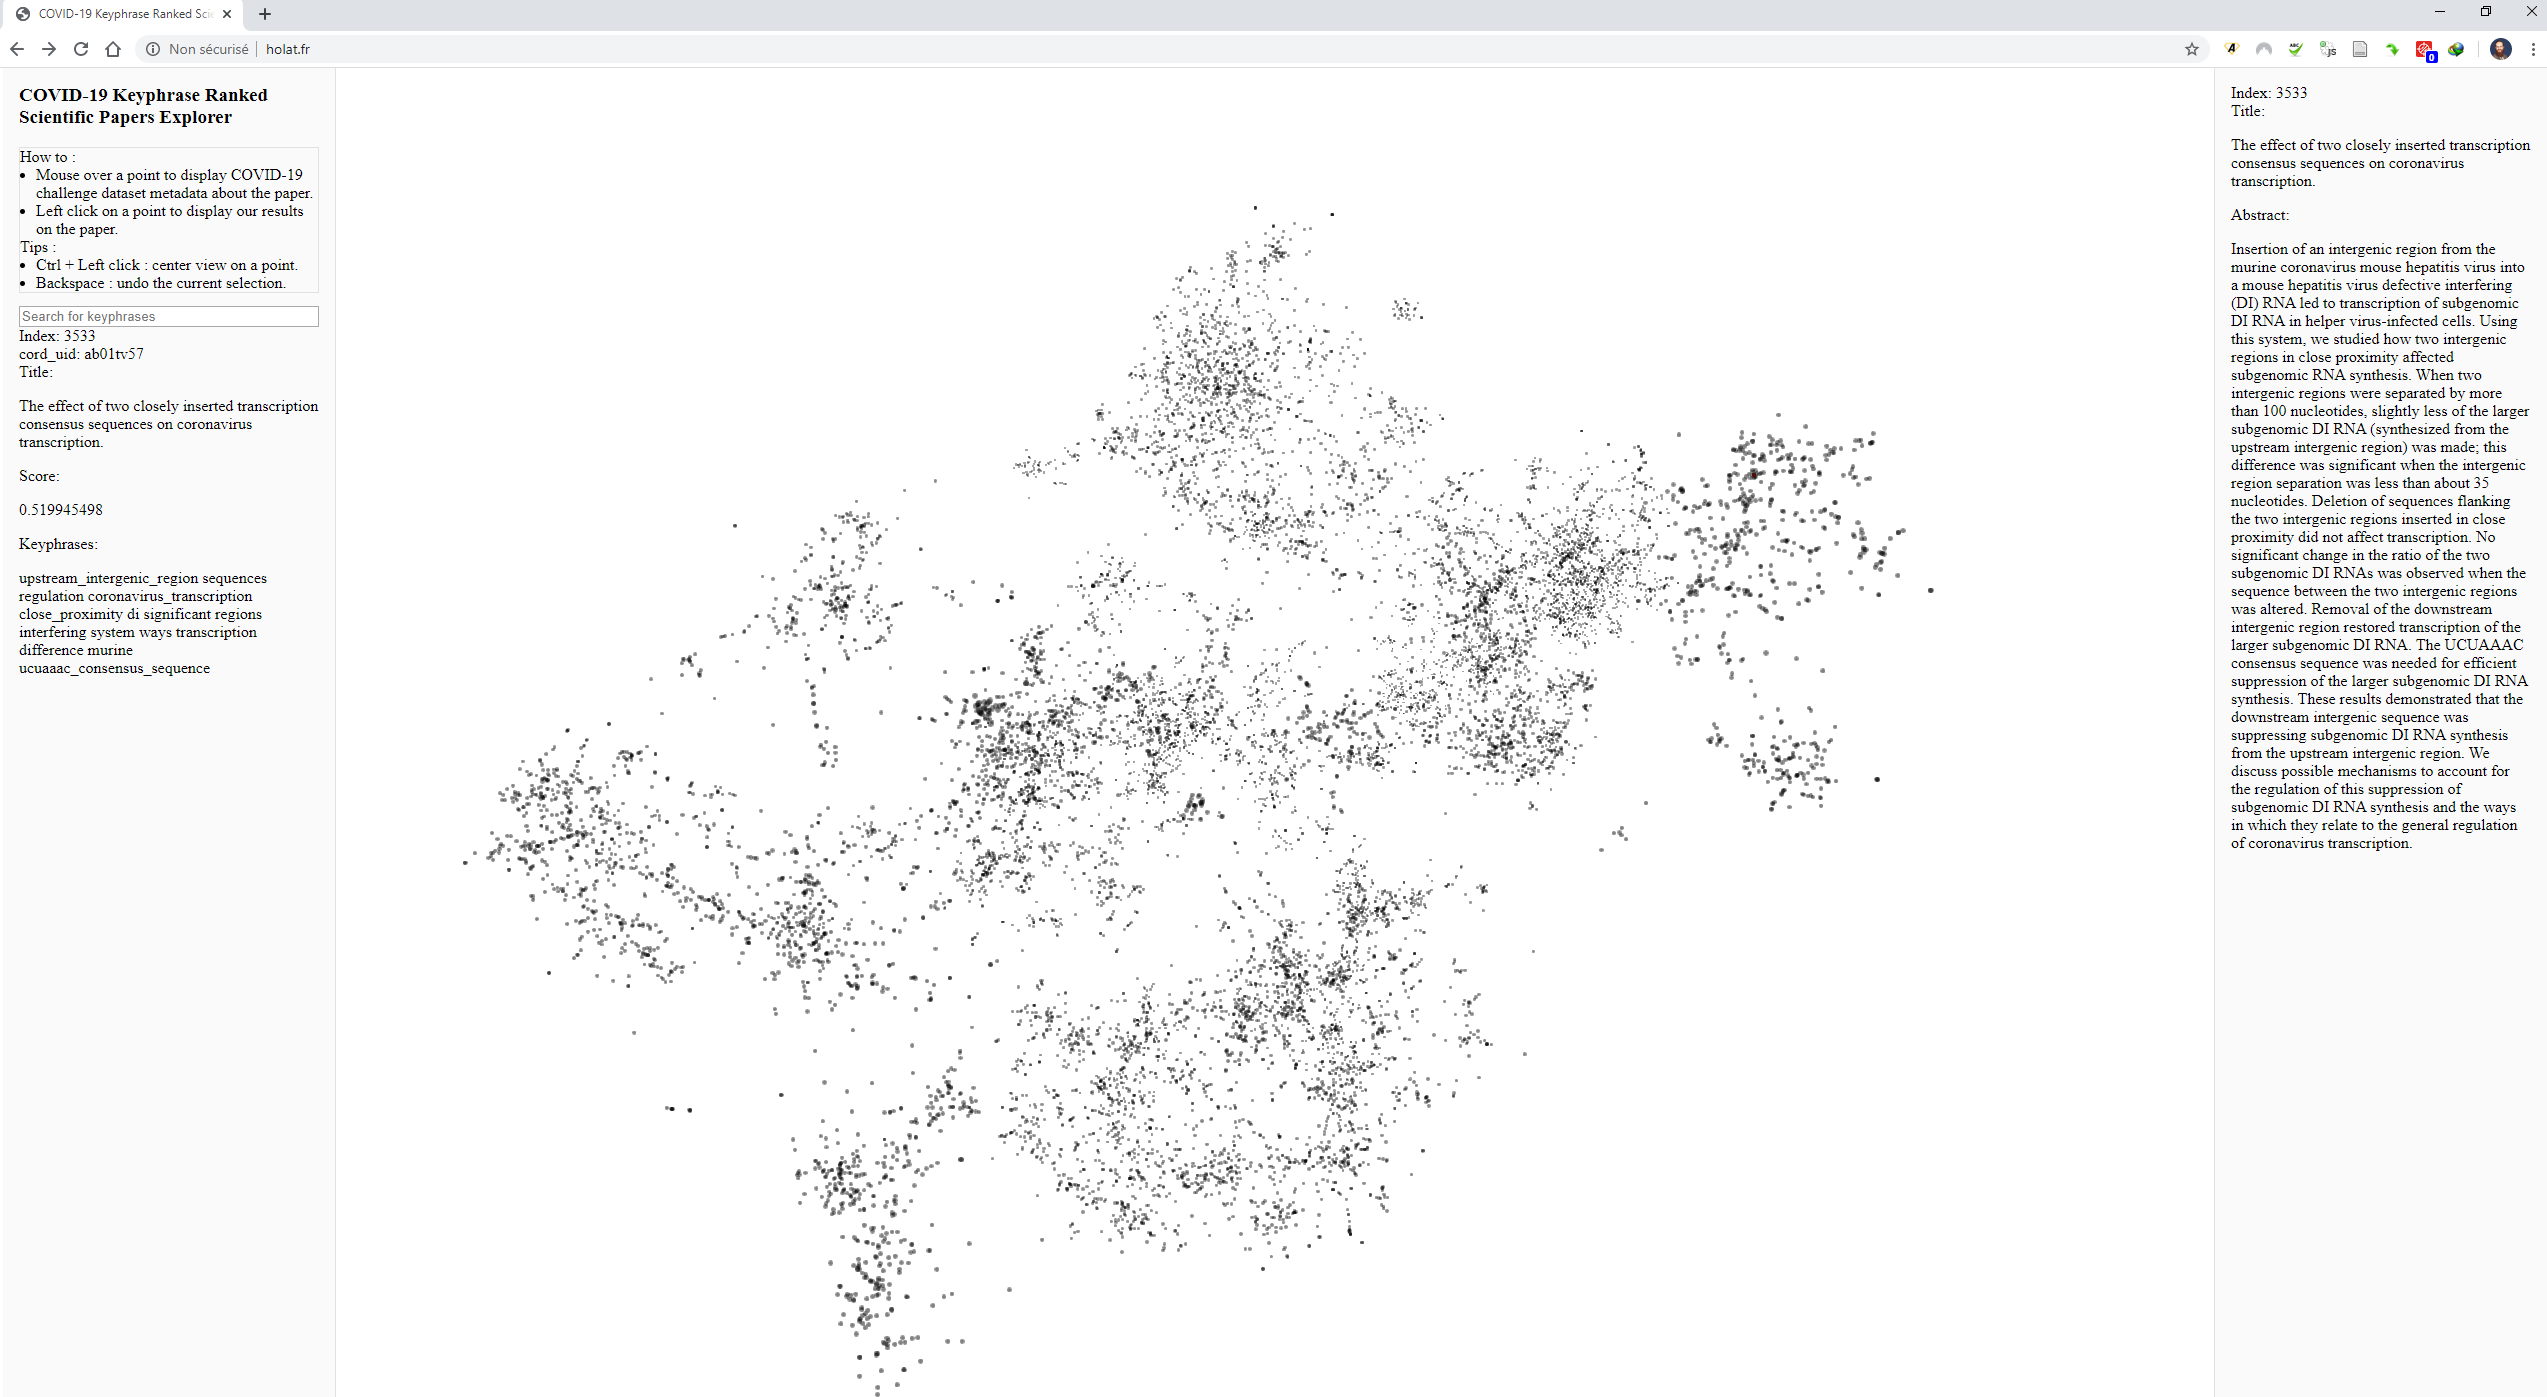

With this notebook, we wanted to share our work on the exploration of the scientific literature given in the dataset of this challenge. Indeed, reading more than 50k papers is harldy feasible, so the community needs a way the easily select the more relevant.

# Ranking papers based on their Keyphrases 

People have tried to fulfill the tasks (or help others to fulfill them) in this Kaggle Challenge in quite a lot of ways. Some created search engines ([jdparsons/biobert-corex-topic-search](https://www.kaggle.com/jdparsons/biobert-corex-topic-search/notebook), [discussion/138026](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/138026)), others proposed tools ([ajrwhite/covid19-tools](https://www.kaggle.com/ajrwhite/covid19-tools/notebook), [discussion/138250](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/138250), [discussion/139106](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/139106)), others used knowledge graphs ([group16/covid-19-knowledge-graph-embeddings](https://www.kaggle.com/group16/covid-19-knowledge-graph-embeddings), [sandyvarma/covid-19-bert-mesh-enabled-knowledge-graph](https://www.kaggle.com/sandyvarma/covid-19-bert-mesh-enabled-knowledge-graph)), some used KeyPhrases [hamid3731/keyphrase-extraction-and-graph-analysis](https://www.kaggle.com/hamid3731/keyphrase-extraction-and-graph-analysis), etc.  

For our part, we decided to propose a way to rank papers and sentences based on their extracted keyphrases. Some already have proposed scoring functions like [discussion/140726](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/140726). Others like [discussion/137558](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/137558) proposed to base the ranking on the study design (with this discussion [discussion/139355](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/discussion/139355) directly linked to it).

To rank papers, we scored them using an heuristic, in which the main component is the Okapi BM25 algorithm based on keyphrases. Our keyphrases lack of a direct scoring, so we scored them, then we could make *extrative summarization* (it is similar to the method originally used with TextRank, for example, [mobassir/mining-covid-19-scientific-papers](https://www.kaggle.com/mobassir/mining-covid-19-scientific-papers/notebook)). 

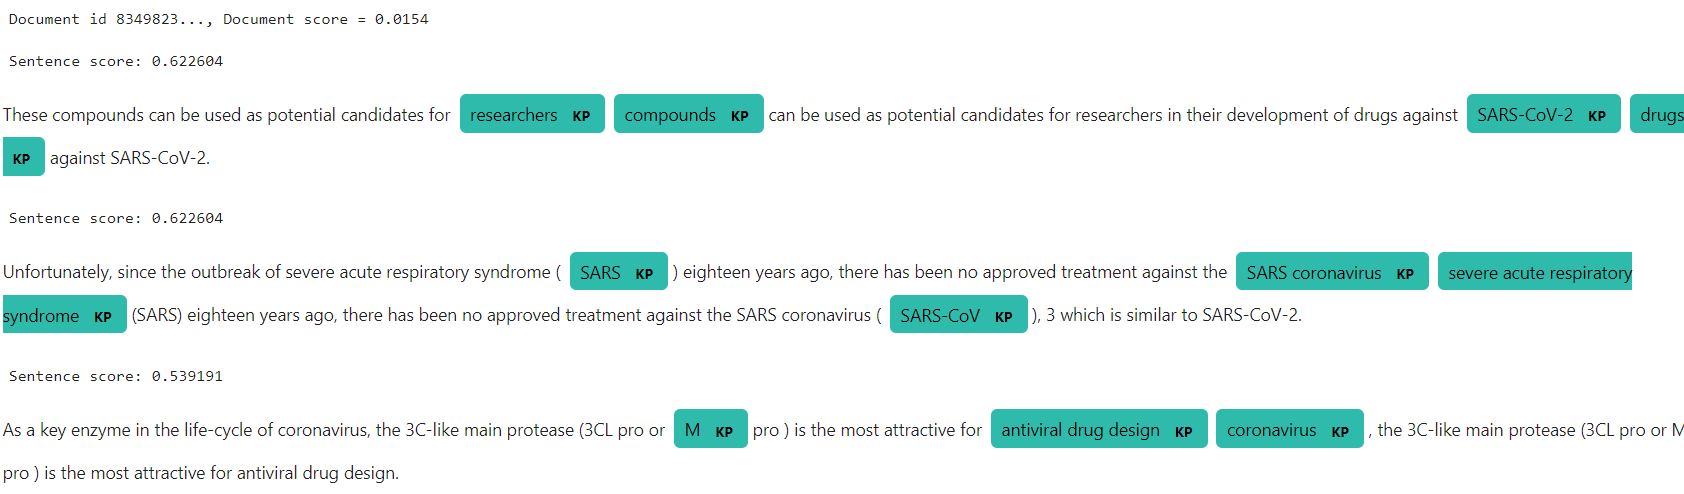

Note : We published an [other notebook](https://www.kaggle.com/pierreholat/keyphrases-ranking-of-data-supplemented-by-api), a few weeks ago, about augmenting the data with public API and extracting the keyphrases on it. But as the v7 of the dataset is way cleaner, we decided to publish this notebook with a focus on keyphrases and visualisation.

# Exploration of the data

From the ranked papers, we selected a subset with the highest scores to show in our visualisation tool, including some handy functionnalities, like a search engine and the selection of the most similar papers. To compute the position in the 3D space and the similarity between papers, we  used the advanced [BioSentVec model](https://github.com/ncbi-nlp/BioSentVec) [1] [2] to get each abstract embeddings. This model is the first open set of sentence embeddings trained with over 30 million documents from both scholarly articles in PubMed and clinical notes in the MIMIC-III Clinical Database.

Our choice was based on two things :	
- Given the biomedical data of this challenge, the BioSentVec embeddings can better capture sentence semantics compared to the other competitive alternatives.
- Sentence embeddings have become an essential part of today's natural language processing (NLP) systems, especially with advanced deep learning methods.


Our main source of inspiration for our visualisation tool is the [Embedding Projector](https://projector.tensorflow.org/), but we wanted an easier way to share a final model to the community (without the limit of a 10 000 maximum sample of the Embedding Projector).

We used the [Three.js library](https://threejs.org/) to build the 3D exploration canvas. Given the little time we had to develop this tool, you might encounter some unexpected bugs, please post them here so we can fix them if possible. 

With our ranking method of papers, our clustering of paper based on the abstract embeddings and our visualisation tools, one can easily find the best articles to answer his query. As shown in this example for the task "What is known about transmission, incubation, and environmental stability?" and the sub tasks "Specifically, we want to know what the literature reports about: Disease models, including animal models for infection, disease and transmission".

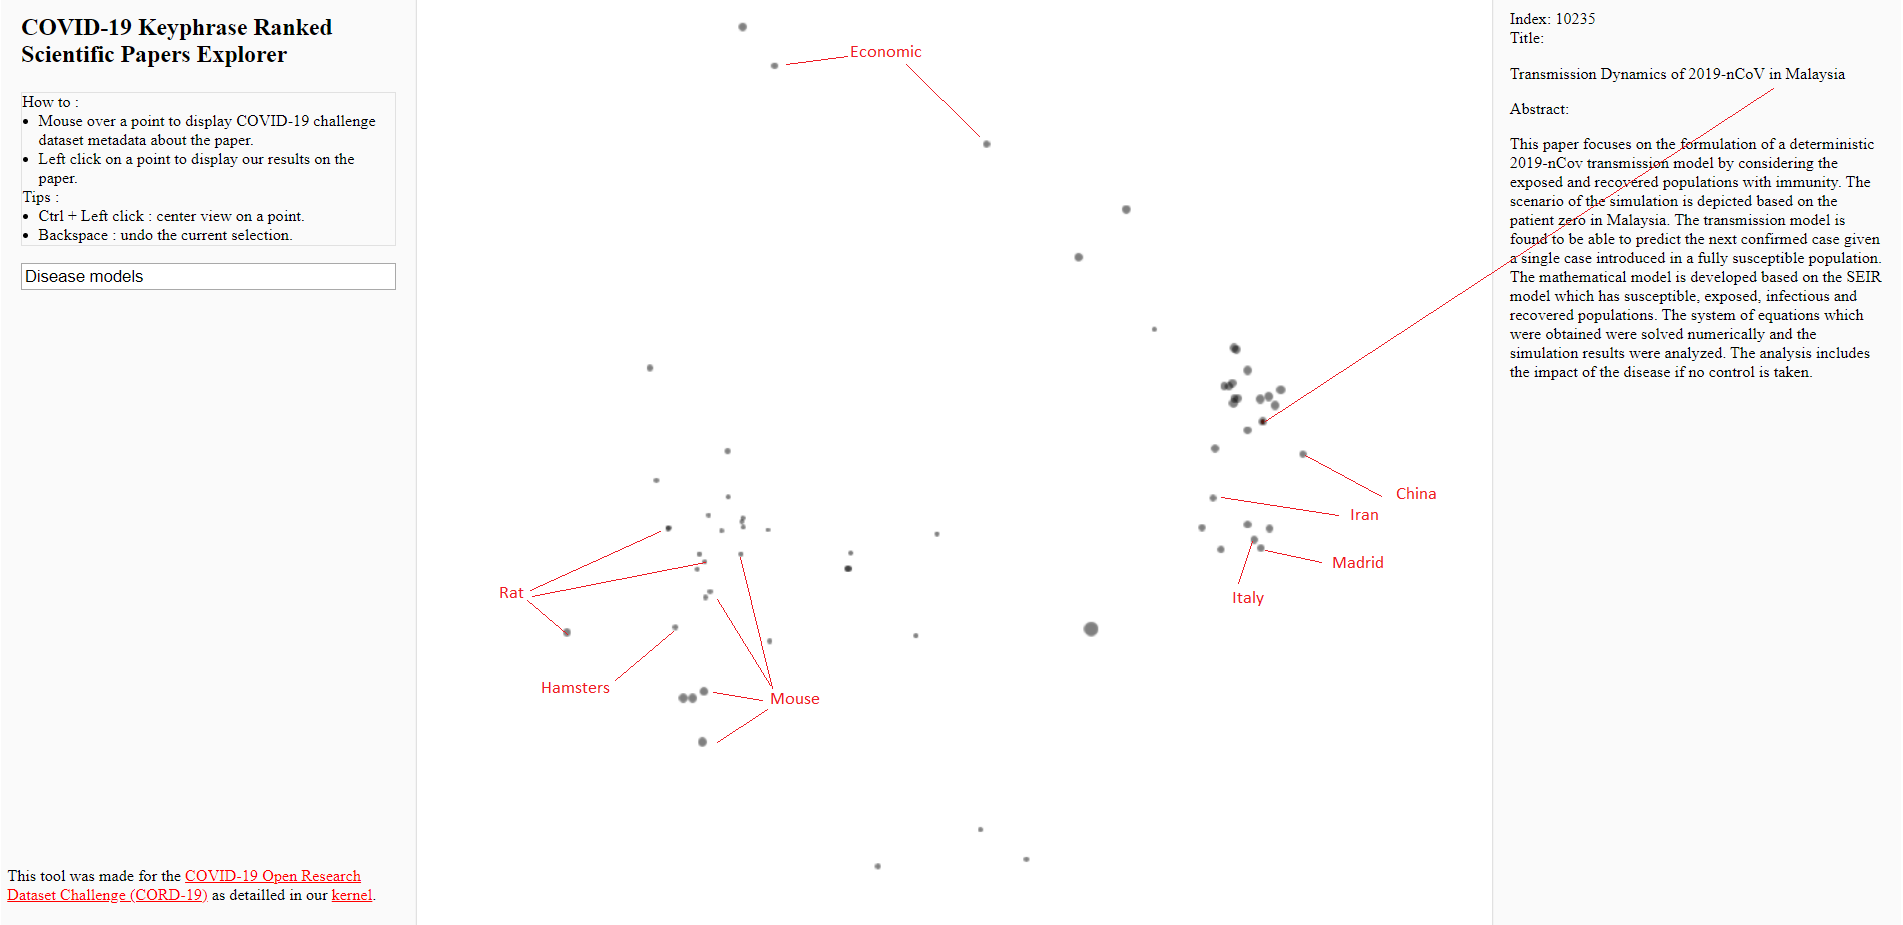


### Our tool is [available here](http://holat.fr)

## Why to use keyphrases?

**Keyphrases** (or keywords or keyterms) are the most representative segments of text within the body of a document. **Extracted keyphrases** can be used for extactive summarization, by ranking sentences. They can be used to score documents and select their most representative sentences helping to retrieve important information.

### Motivation: 

*TextRank* is a graph-based ranking model for unsupervised automatic keyphrase extraction. In the paper [TextRank: Bringing Order into Text](https://www.aclweb.org/anthology/W04-3252/), it is proposed as an useful method for extractive summarization, since it produces ranked keyphrases. An implementation of this method is available for [Spacy](https://spacy.io/) in the universe modules [pyTextRank](https://spacy.io/universe/project/spacy-pytextrank). However, as mentioned in the challenge kernel [KeyPhrase Extraction and Graph analysis](https://www.kaggle.com/hamid3731/keyphrase-extraction-and-graph-analysis), TextRank is not the best available method. 

Instead of using TextRank to extract keyphrases, we propose to use a supervised CRF-based method that *filters candidates of keyphrases* using their *PoS tag sequences* [**LIPN** at SemEval 2017 Task 10](https://www.aclweb.org/anthology/S17-2174/). Several members of our team participating in the current Kaggle challenge are former integrants of the LIPN team who presented that work. 

To consider about *kleis*:
*     It is a non-rank based method to extract keyphrases
*     It is a supervised method
*     It is not trained over medical data

We used an improved version of the method available as the python package [kleis](https://pypi.org/project/kleis-keyphrase-extraction/). The latest version of this package achieves a **F1 score of 0.405 (40.5%)** on the dataset *SemEval 2017 Task 10* for the subtask of keyphrase identification. 

### Our approach

On resume:

1.     We extracted keyphrases from all papers (using a supervised non-rank based method) 
2.     We rank keyphrases with TF-IDF and metadata information (location of the keyphrase in the paper)
3.     We selected 15 keyphrases to represent each document (maximum)
4.     We scored sentences depending on the presence of the 15 keyphrases (like TextRank)
5.     We retrieve the 5 highest scored sentences (maximum)
6.     We scored each paper averaging three scores:
       * Okapi BM25 using papers' keyphrases as queries
       * Average of the scores of the retrieved sentences
       * Penalization of very small texts: cnt(retrieved_sents)/max_num_sents



[1] Zhang Y, Chen Q, Yang Z, Lin H, Lu Z. BioWordVec, improving biomedical word embeddings with subword information and MeSH. Scientific Data. 2019.

[2] Chen Q, Peng Y, Lu Z. BioSentVec: creating sentence embeddings for biomedical texts. The 7th IEEE International Conference on Healthcare Informatics. 2019. Bio

# Part 1 - Loading the dataset

In [ ]:
import os
import re
import gc
import sys
import math
import glob
import json
import spacy
import pandas
import random
import warnings
import numpy as np
import cufflinks as cf

from spacy import displacy
from tqdm.notebook import tqdm
from collections import Counter 
from collections import defaultdict
from nltk.corpus import stopwords
from IPython.core.display import HTML, Markdown

# filter warnings
warnings.filterwarnings('ignore')

# defining some options for displacy
colors = {"KP": "#2fbbab"}
options = {"ents": ["KP"], "colors": colors}

# defining some options for pandas
pandas.set_option('display.max_rows', 5)
pandas.set_option('display.max_columns', None)

# defining some options for cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Let's look at the data (version 7)
- there is a lot of missing data in each column, we forced the type of some column to avoir parsing errors later
- new in v6 and v7 there is a json file from XML parse and PDF parse.
- that's actually a really good thing, because we found a lot of PDF parsing errors in the dataset (see our [previous notebook](https://www.kaggle.com/pierreholat/keyphrases-ranking-of-data-supplemented-by-api))

### Let's load the metadata

In [ ]:
v7_path = '/kaggle/input/CORD-19-research-challenge'
df = pandas.read_csv(f'{v7_path}/metadata.csv', 
    usecols=['cord_uid', 'sha', 'pmcid', 'title', 'abstract', 'publish_time', 'authors'],
    dtype={'cord_uid' : str, 'sha': str, 'pmcid': str, 'title': str, 'abstract': str, 'authors': str},
    parse_dates=['publish_time'], 
    keep_default_na=False
)

### How to load the json
- we use this code on our server to extract the keyphrases from the body text
- unfortunately, the limited RAM on kaggle prevent us of doing it here but our results will be available on our tool
- we made a dictionnary of the path of each file
- "sha" as key for the papers from PDF parsing
- "pmcid" as key for the papers from XML parsing

In [ ]:
def code_we_used_on_our_server() :
    pdf_json_dict = dict()
    for filename in tqdm(glob.glob(f'{v7_path}/**/pdf_json/*.json', recursive=True), leave = False): 
        pdf_json_dict[json.load(open(filename, 'rb'))['paper_id']] = filename
    print(len(pdf_json_dict), "papers from PDF parsing")

    xml_json_dict = dict()
    for filename in tqdm(glob.glob(f'{v7_path}/**/pmc_json/*.json', recursive=True), leave = False): 
        xml_json_dict[json.load(open(filename, 'rb'))['paper_id']] = filename
    print(len(xml_json_dict), "papers from XML parsing")

### Then we merged the data from the metadata and from the json files
- So we used the metadata file as the source and we augmented it with all the json data ;
- For the body text, due to the PDF parsing errors, we prioritized the xml json over the pdf json;

In [ ]:
def code_we_used_on_our_server() :
    tqdm.pandas()
    df["body_text"] = df.apply(lambda x: [], axis=1)
    df["sha"] = df["sha"] = df["sha"].apply(lambda x: x.split("; ")[0])
    for index, meta_data in tqdm(df.iterrows(), total = len(df.index)) :
        if meta_data["sha"] != "" and meta_data["sha"] in pdf_json_dict :
            file = json.load(open(pdf_json_dict[meta_data["sha"]], 'rb'))
            if(file['body_text'] != []) :
                df.at[(df[df['sha'] == meta_data["sha"]].index)[0], 'body_text'] = file['body_text']

        if meta_data["pmcid"] != "" and meta_data["pmcid"] in xml_json_dict :
            file = json.load(open(xml_json_dict[meta_data["pmcid"]], 'rb'))
            if(file['body_text'] != []) :
                df.at[(df[df['pmcid'] == meta_data["pmcid"]].index)[0], 'body_text'] = file['body_text']  

### So Let's see our data now :

In [ ]:
print("For the",len(df), "papers in the dataset (v7)")
print("-", len(df[df["abstract"] != ""]), "papers with abstract")

# Part 2 - Cleaning the text from the abstract
- Even if we tried to get a maximum of missing data, we still missed some, so we deleted those and the duplicate in the cleaning step.

In [ ]:
df['abstract'] = df['abstract'].apply(lambda x: re.sub('(\\n)+', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('[a|A]bstract( [0-9]+)*', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('ABSTRACT( [0-9]+)*', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('[b|B]ackground(: )*', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('BACKGROUND(: )*', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('^[\s]*$', ' ', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub(r"http\S+", '', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub('"', '', x))
df['abstract'] = df['abstract'].apply(lambda x: re.sub("'", '', x))

In [ ]:
df['abstract'].replace("", np.nan,inplace=True)
df.dropna(subset=['abstract'], inplace=True)
print("There are",len(df),"articles after removing missing values.")

In [ ]:
df.drop_duplicates(subset=['abstract'], inplace=True)
print("There are",len(df),"articles after removing duplicate abstracts.")

In [ ]:
df.drop(df.index[(df.abstract.str.len() < 100)],inplace=True)
print("There are",len(df),"articles after removing abstracts with few characters.")

In [ ]:
display(df)

# Part 3 - Ranking important sentences and documents using extracted keyphrases (keywords).

#### Instaling kleis
*kleis* is available in pypi over the name `kleis-keyphrase-extraction`

In [ ]:
!pip install --user kleis-keyphrase-extraction

*Note:* Ignore the warning related to the corpus. The package is going to use the pre-trained models.

In [ ]:
import kleis.resources.dataset as kl
from kleis.config.config import SEMEVAL2017

#### Configuring and importing kleis

Loading SemEval2017 model.

In [ ]:
# load semeval 2017 dataset
dataset = kl.load_corpus(name=SEMEVAL2017)

# recomended options
dataset.training(features_method="simple-posseq", filter_min_count=16, tagging_notation="BILOU")

#### Kleis: Extracting keyphrases from a random file
Openning random file to exctract keyphraes and testing keyphrase extraction over from an abstract.

In [ ]:
text_sample = df.sample()['abstract'].values[0]
keyphrases_sample = dataset.label_text(text_sample)
displacy.render({
        "text": text_sample,
        # keyphrases are in brat-like format (we use only the span)
        "ents": [{"start": start, "end": end, "label": "KP"}  for _, (_, (start, end)), _ in keyphrases_sample],
        "title": None
}, style="ent", options=options, manual=True)

### Now we proceed to extract all the keyphrases
- We applied the code from the example above to each abstract and body text. We saved only the spans of the keyphrases.

In [ ]:
special_chars = re.compile(r"\W")
underscores = re.compile(r"[_]+") 

def normalize_term(t):
    t_normalized, _ = re.subn(special_chars, "_", t.lower())
    t_normalized, _ = re.subn(underscores, "_", t_normalized)
    return t_normalized

In [ ]:
def extract_abstract_kps(x) :
    return [(normalize_term(kptext), (start, end)) for _, (_, (start, end)), kptext in dataset.label_text(x)]

In [ ]:
tqdm.pandas()
df["abstract_kps"] = df["abstract"].progress_apply(extract_abstract_kps)

In [ ]:
display(df)

## How to rank sentences and documents using keyphrases ?

To rank documents and sentences, first, we need to rank keyphrases.

### The simplest way to rank keyphrases => TF-IDF

Using TF-IDF (term/keyphrase frequency - inverse document frequency) is an inmediate alternative to rank keyphrases.

#### TF

First, we get count each keyphrase and the number of documents containing each keyphrase.

In [ ]:
def get_kptext(list_kps):
    """Return keyphrase text"""
    return [ktext for kps in list_kps for ktext, _ in kps]

# initialize
df["tf"] = df["cord_uid"].apply(lambda x : {}) # it is later turned into a list

# keyphrase occurrences per doc
kps_docs_count = Counter() # |{d: k \in d}|
keyphrases = Counter()
for index, row in tqdm(df.iterrows(), total = len(df.index)):
    
    # list of keyphrases per document
    current_kps_count = Counter(get_kptext([row["abstract_kps"]]))
    
    # all keyphrases
    keyphrases.update(current_kps_count)
    
    # +1 for each keyphrase in the document
    kps_docs_count.update(current_kps_count.keys()) # |{d: k \in d}|
    
    # Keyphrase frequency # TF
    df.at[(df[df['cord_uid'] == row['cord_uid']].index)[0], 'tf'] = current_kps_count # Cnt

Now, we obtain the keyphrase frequency excluding keyphrases occurring only one time.

In [ ]:
# keep cnt(keyphrase) > 1
keyphrases = {kp: cnt for kp, cnt in keyphrases.items() if cnt > 1}
# remove single symbols normalized
if "_" in keyphrases:
    del keyphrases["_"]

def get_tf(kps):
    total_count = sum(kps.values())
    return [(kp, cnt/total_count) for kp, cnt in kps.items() if kp in keyphrases]

tqdm.pandas()
df["tf"] = df["tf"].progress_apply(get_tf) # TF

#### IDF

We save the IDF for each keyphrase in the documents. 


Note: It is later used to rank documents.

In [ ]:
N = len(df) # number of documents
tqdm.pandas()
df["idf"] = df["tf"].progress_apply(lambda x : [(kp, np.log(N/kps_docs_count[kp])) for kp, _ in x]) # IDF

#### TF-IDF

Now, we obtain the TF-IDF

In [ ]:
def get_tf_idf(e):
    tf, idf = e
    return [(kp, ktf*idf[i][1]) for i, (kp, ktf) in enumerate(tf)]

tqdm.pandas()
df["tf-idf"] = df[['tf','idf']].progress_apply(lambda x: get_tf_idf(x), axis=1)

### Ranking keyphrases (tf-idf + title + abstract)

Keyphrases present in the title or abstract are more important than the rest. 

We add +1 to the keyphrase's tf-idf if it is in both, title and abstract, 0.5 if it is in only one of them and 0 otherwise.

**Note:** Use the variable to control the max number of retrieved keyphrases.

```python
# default
MAX_KEYPHRASES = 15
```

In [ ]:
MAX_KEYPHRASES = 15

def rank_keyphrases(e):
    tf_idf, title, abstract = e
    # normalized title and abstract
    # underscores are added to search each _keyphrase_ as an single entity 
    # considering if it is the first or last word
    title = "_" + normalize_term(title) + "_" 
    abstract = "_" + normalize_term(abstract) + "_"
    # check if keyphrase is in title or abstract
    tf_idf = map(lambda e: (e[0], e[1] + (int(title.find("_" + e[0] + "_") >= 0) + int(abstract.find("_" + e[0] + "_") >= 0))/2 ), tf_idf)
    
    return sorted(tf_idf, key=lambda e: e[1], reverse=True)[:MAX_KEYPHRASES]
    
tqdm.pandas()
df["ranked_kps"] = df[["tf-idf", "title", "abstract"]].progress_apply(lambda x: rank_keyphrases(x), axis=1) # rank by tf-idf + title + abstract

We saved a simple list of the keyphrases.

In [ ]:
tqdm.pandas()
df["keyphrases"] = df["ranked_kps"].progress_apply(lambda x: set(kp for kp, _ in x))

An example of ranked keyphrases in a document.

In [ ]:
example = df.iloc[random.randrange(len(df))]
kps, tfidf = zip(*(example['ranked_kps']))
pandas.DataFrame({'ranked_kps': tfidf}, index=kps).iplot(kind='bar', title=example['title'])

### Ranking sentences and documents

Loading spacy model to manipulate text easily.

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["ner"])
nlp.pipe_names

#### How to rank a sentence using the weights from keyphrases?

The simplest way is to represent each sentence as an unit vector of keyphrases' weights (e.g., TF-IDF). From the resulting vector, the norm L2 can be used to obtain an scalar weight of the sentence.

**Note:** Use the variable to control the max number of retrieved sentences per document.

```python
# default
MAX_SENTS = 5
```

In [ ]:
MAX_SENTS = 5

df["ranked_sentences"] = df["cord_uid"].apply(lambda x : [])
df["doc_score_sents"] = df["cord_uid"].apply(lambda x : 0.0)
for index, row in tqdm(df.iterrows(), total = len(df.index)):
    
    # list of keyphrases per document
    paragraphs_texts = nlp.pipe(map(lambda par: par["text"], [{"text": row["abstract"]}]))
    
    # merge all keyphrases per paragraph
    full_kps = [row['abstract_kps']]
   
    # sum_sent_scores = 0.0
    sentences_count = 0
    scored_sentences = []
    # for each paragraph
    for i_par, par in enumerate(paragraphs_texts):
        
        # norm L1 of ranked keyphrases 
        l1_norm_rkps = sum(map(lambda x: x[1], row['ranked_kps'])) 
        
        # keyphrases in the curent paragraph
        paragraph_kps = full_kps[i_par]

        for s in par.sents:
            sentences_count += 1
            sent_start, sent_end = s.start_char, s.end_char
            s_text = s.text
            s_score = 0.0 # sentence score
            s_spans = []

            for rkp, kscore in row['ranked_kps']:
                # spans of current keyphrase
                kspans = [pkp_spans for pkp_text, pkp_spans in paragraph_kps if pkp_text == rkp]

                for kstart, kend in kspans:
                    if kstart >= sent_start and kstart <= sent_end:
                        s_score += (kscore/l1_norm_rkps)**2 # sum(X^2)
                        s_spans.append((kstart - sent_start, kend - sent_start))

            if s_score > 0.0:
                s_score = np.sqrt(s_score) # sqrt(sum(X^2)) # norm L2 normalized
                # sum_sent_scores += s_score

            scored_sentences.append((i_par, s_score, s_text, s_spans))
            
    # save ranked sentences
    ranked_sentences = sorted(scored_sentences, key=lambda x: x[1], reverse=True)[:MAX_SENTS]
    df.at[(df[df['cord_uid'] == row['cord_uid']].index)[0], 'ranked_sentences'] = ranked_sentences
    df.at[(df[df['cord_uid'] == row['cord_uid']].index)[0], 'doc_score_sents'] = sum([s_score for _, s_score, _, _ in ranked_sentences])/(sentences_count if sentences_count > 0 else 0.0)

#### Scoring documents using BM25 and keyphrases.

We use BM25 to score documents by using their keyphrases as queries for themselves.

In [ ]:
# df["score"] = df.apply(lambda x: x['sum_sent_scores']/x['sentences_count'])
docs_avgsize = df['tf'].apply(lambda x: len(x)).sum()/len(df)

def okapi_bm25(d):
    """OKAPI BM25 over keyphrases"""
    # default values in elastic search
    okapi_b = 0.75
    okapi_k1 = 1.2

    kps, tf, idf = d
    tf = dict(tf)
    idf = dict(idf)
    
    doc_size = len(tf)
    okapi_denominator_part = okapi_k1 * (1 - okapi_b + okapi_b * doc_size/docs_avgsize)
    
    return sum([idf[kp] * (tf[kp] * (okapi_k1 + 1)) / (tf[kp] + okapi_denominator_part) for kp in kps])

tqdm.pandas()
df['bm25'] = df[['keyphrases', 'tf', 'idf']].progress_apply(okapi_bm25, axis=1)

We free some memory

In [ ]:
del nlp
df.drop(columns=['abstract_kps'], inplace=True)

#### Scoring documents using BM25 and keyphrases.

We use BM25 to score documents by using their keyphrases as queries for themselves.

In [ ]:
docs_avgsize = df['tf'].apply(lambda x: len(x)).sum()/len(df)

def okapi_bm25(d):
    """OKAPI BM25 over keyphrases"""
    # default values in elastic search
    okapi_b = 0.75
    okapi_k1 = 1.2

    kps, tf, idf = d
    kps = set(kp for kp, _ in kps)
    tf = dict(tf)
    idf = dict(idf)
    
    doc_size = len(tf)
    okapi_denominator_part = okapi_k1 * (1 - okapi_b + okapi_b * doc_size/docs_avgsize)
    
    return sum([idf[kp] * (tf[kp] * (okapi_k1 + 1)) / (tf[kp] + okapi_denominator_part) for kp in kps])

tqdm.pandas()
df['score'] = df[['ranked_kps', 'tf', 'idf']].progress_apply(okapi_bm25, axis=1)

We free some memory

In [ ]:
df.drop(columns=['tf'], inplace=True)
df.drop(columns=['idf'], inplace=True)

#### Ranking documents (BM25 + sentence scoring)

Now, we use sentence and BM25 scorings to rank each document.

In [ ]:
phi = 1/3
bm25_max = df['score'].max()
score_sents_max = df['doc_score_sents'].max()
cnt_sents_max = MAX_SENTS

def get_doc_rank(e):
    bm25_score, score_sents, rsents = e
    return phi*(bm25_score/bm25_max + score_sents/score_sents_max + len(rsents)/cnt_sents_max)

tqdm.pandas()
df['score'] = df[['score', 'doc_score_sents', 'ranked_sentences']].apply(get_doc_rank, axis=1)

We free some memory

In [ ]:
df.drop(columns=['doc_score_sents'], inplace=True)

### Example of ranked documents and sentences

The example below shows ten ranked documents including their ranked sentences.

In [ ]:
df_nlargest = df.nlargest(10, 'score')

for index, row in tqdm(df_nlargest.iterrows(), total = len(df_nlargest.index)):
    print("\nDoc score: %0.4f" % row['score'])
    print("\n  Title: " + row['title'])
    for s in row['ranked_sentences']:
        i_par, s_score, text, spans = s
        print("\n[+] Sentence score: %0.4f" % s_score)
        displacy.render({
            "text": text,
            # keyphrases are in brat-like format (we use only the span)
            "ents": [{"start": start, "end": end, "label": "KP"}  for start,end in spans],
            "title": None
        }, style="ent", options=options, manual=True)

# We now have all our papers ranked
## So let's select only the best paper to display in our tools
- indeed, displaying 44000 papers is irrelevant

In [ ]:
df.sort_values(by='score', ascending=False, inplace=True)

In [ ]:
df.drop(df.loc[df['score']<=0.44].index, inplace = True)
df.reset_index(drop=True, inplace = True)

In [ ]:
display(df)

### We used the [BioSentVec model](https://github.com/ncbi-nlp/BioSentVec) to get each abstract embeddings for :
- projecting in our 3D exploration tool;
- computing similarity between abstract;


### Again, the kaggle notebook limitation prevent us to replicate this in here
- But let's share our code anyway

In [ ]:
def code_we_used_on_our_server() :
    model_path = "/path_to/BioSentVec_PubMed_MIMICIII-bigram_d700.bin"
    model = sent2vec.Sent2vecModel()
    try:
        model.load_model(model_path)
    except Exception as e:
        print(e)
    print('model successfully loaded')
    
    stop_words = set(stopwords.words('english'))
    
    def preprocess_sentence(x):
        x = x.replace('/', ' / ')
        x = x.replace('.-', ' .- ')
        x = x.replace('.', ' . ')
        x = x.replace('\'', ' \' ')
        x = x.replace('[', ' [ ')
        x = x.replace(']', ' ] ')
        x = x.replace('(', ' ( ')
        x = x.replace(')', ' ) ')
        x = x.replace('%', ' % ')
        x = x.replace('"', ' " ')
        x = x.lower()

        return " ".join([token for token in word_tokenize(x) if token not in punctuation and token not in stop_words])
    
    tqdm.pandas()
    df_json['abstract_tokenised'] = df_json['abstract'].progress_apply(preprocess_sentence)
    df_json["abstract_vector"] = df_json["abstract_tokenised"].progress_apply(lambda x : model.embed_sentence(x))
    
    with open("/calcul/kaggle_challenge/CORD-19-research-challenge_v7/CORD-19_v7_final_data_0.36_vectors.tsv", 'w+') as tensors:
        with open("/calcul/kaggle_challenge/CORD-19-research-challenge_v7/CORD-19_v7_final_data_0.36_metadata.tsv", 'w+') as metadata:
            metadata.write("Index\tTitle\n")
            for index, row in tqdm(df_json.iterrows(), total = len(df_json.index)) :
                metadata.write("%d\t%s\n" % (index, row["title"].encode('utf8')))
                vector_row = '\t'.join(map(str, row["abstract_vector"][0]))
                tensors.write(vector_row + "\n")
    
    def most_similar_sentence(vec, num):
        sims = empty(len(df_json), dtype=float)
        vec_len = np_norm(vec)
        for idx, row in df_json.iterrows() :
            vec2 = row["abstract_vector"]
            vec2_len = np_norm(vec2)
            sims[idx] = np.dot(vec[0],vec2[0]) / vec_len / vec2_len
        nearest = []
        topN = argsort(sims)[::-1]
        display(topN)
        for top_sent in topN:
            if(idx != top_sent):
                nearest.append((top_sent,float(sims[top_sent])))
                if len(nearest) == num: break
        return nearest
    
    def apply_features(x):
        return most_similar_sentence(x, 10)

    df_json["KNN"] = df_json["abstract_vector"].parallel_apply(apply_features)

# For the visualisation of those results, we made our tool available [here](http://holat.fr)
## Have fun (we had a lot working on this).